DOMAIN: Startup ecosystem
• CONTEXT: Company X is a EU online publisher focusing on the startups industry. The company specifically reports on the business related to 
technology news, analysis of emerging trends and profiling of new tech businesses and products. Their event i.e. Startup Battlefield is the world’s 
pre-eminent startup competition. Startup Battlefield features 15-30 top early stage startups pitching top judges in front of a vast live audience, 
present in person and online.
• DATA DESCRIPTION: CompanyX_EU.csv - Each row in the dataset is a Start-up company and the columns describe the company. 
• DATA DICTIONARY:
1. Startup: Name of the company
2. Product: Actual product
3. Funding: Funds raised by the company in USD
4. Event: The event the company participated in
5. Result: Described by Contestant, Finalist, Audience choice, Winner or Runner up
6. OperatingState: Current status of the company, Operating ,Closed, Acquired or IPO
*Dataset has been downloaded from the internet. All the credit for the dataset goes to the original creator of the data.
• PROJECT OBJECTIVE: Analyse the data of the various companies from the given dataset and perform the tasks that are specified in the below 
steps. Draw insights from the various attributes that are present in the dataset, plot distributions, state hypotheses and draw conclusions from 
the dataset.

PROJECT OBJECTIVE: Analyse the data of the various companies from the given dataset and perform the tasks that are specified in the below 
steps. Draw insights from the various attributes that are present in the dataset, plot distributions, state hypotheses and draw conclusions from 
the dataset

STEPS AND TASK [15 Marks]:
1. Read the CSV file.
2. Data Exploration: [1 Mark]
A. Check the datatypes of each attribute.
B. Check for null values in the attributes

In [1]:
import numpy as np
import pandas as pd

# Loading the CSV file
df = pd.read_csv('DS_Part3_CompanyX_EU.csv')

# look at a quick view 
print(df.head(5))


           Startup             Product Funding             Event  \
0           2600Hz          2600hz.com     NaN   Disrupt SF 2013   
1             3DLT            3dlt.com   $630K  Disrupt NYC 2013   
2      3DPrinterOS     3dprinteros.com     NaN   Disrupt SF 2016   
3       3Dprintler      3dprintler.com     $1M   Disrupt NY 2016   
4  42 Technologies  42technologies.com     NaN  Disrupt NYC 2013   

            Result OperatingState  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0       Contestant      Operating         NaN         NaN         NaN   
1       Contestant         Closed         NaN         NaN         NaN   
2       Contestant      Operating         NaN         NaN         NaN   
3  Audience choice      Operating         NaN         NaN         NaN   
4       Contestant      Operating         NaN         NaN         NaN   

   Audience choice  Operating  Unnamed: 11 Funding.1  
0  Audience choice     Closed          NaN       NaN  
1       Contestant  Operating          NaN

In [2]:
# Check the data types of each attribute
print(df.dtypes)

Startup             object
Product             object
Funding             object
Event               object
Result              object
OperatingState      object
Unnamed: 6         float64
Unnamed: 7         float64
Unnamed: 8         float64
Audience choice     object
Operating           object
Unnamed: 11        float64
Funding.1           object
dtype: object


In [3]:
# Check for null values in the attributes
print(df.isnull().sum())

Startup              0
Product              6
Funding            214
Event                0
Result               0
OperatingState       0
Unnamed: 6         662
Unnamed: 7         662
Unnamed: 8         662
Audience choice    648
Operating          648
Unnamed: 11        662
Funding.1          422
dtype: int64


3. Data preprocessing & visualisation: [4 Marks]
A. Drop the null values. [1 Mark]
B. Convert the ‘Funding’ features to a numerical value.
(Execute below code)
df1.loc[:,'Funds_in_million'] = df1['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))
C. Plot box plot for funds in million. [1 Mark]
D. Check the number of outliers greater than the upper fence. [1 Mark]
E. Check frequency of the OperatingState features classes. [1 Mark]

In [4]:
# Drop the null values
df = df.dropna()

# Confirm that null values have been dropped
print(df.isnull().sum())

Startup            0
Product            0
Funding            0
Event              0
Result             0
OperatingState     0
Unnamed: 6         0
Unnamed: 7         0
Unnamed: 8         0
Audience choice    0
Operating          0
Unnamed: 11        0
Funding.1          0
dtype: int64


In [5]:
df.head

<bound method NDFrame.head of Empty DataFrame
Columns: [Startup, Product, Funding, Event, Result, OperatingState, Unnamed: 6, Unnamed: 7, Unnamed: 8, Audience choice, Operating, Unnamed: 11, Funding.1]
Index: []>

In [6]:

df1= df.copy()

# Add Funds_in_million column
df1['Funds_in_million'] = df['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))


# Confirm the conversion
print(df1['Funds_in_million'].head(10))


# # Remove '$' sign from funding values
# df1['Funding'] = df1['Funding'].str.replace('$', '')

# # Replace 'K' with '000' and 'M' with '000000'
# df1['Funding'] = df1['Funding'].str.replace('K', '000').str.replace('M', '000000')

# # Convert 'Funding' column to numeric
# df1['Funding'] = pd.to_numeric(df1['Funding'], errors='coerce')

Series([], Name: Funds_in_million, dtype: object)


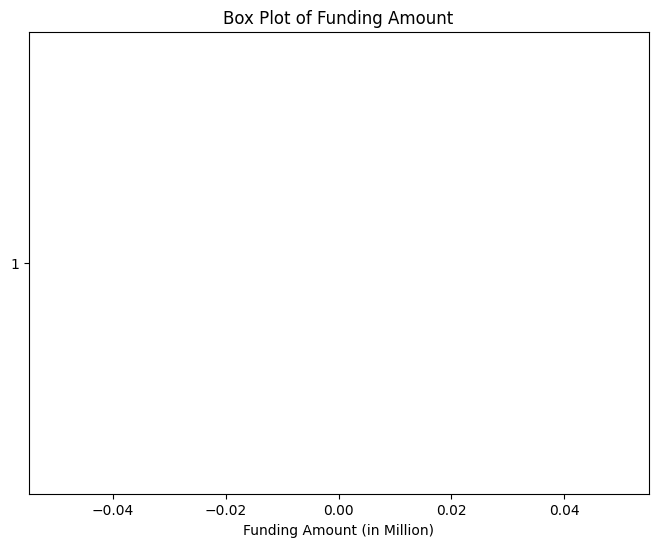

In [7]:
import matplotlib.pyplot as plt

# Plot box plot for Funds_in_million
plt.figure(figsize=(8, 6))
plt.boxplot(df1['Funds_in_million'], vert=False)
plt.xlabel('Funding Amount (in Million)')
plt.title('Box Plot of Funding Amount')
plt.show()

In [8]:
# Calculate the first quartile (Q1)
Q1 = df1['Funds_in_million'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df1['Funds_in_million'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the upper fence
upper_fence = Q3 + 1.5 * IQR

# Count the number of outliers greater than the upper fence
outliers_count = len(df1[df1['Funds_in_million'] > upper_fence])

# Display the number of outliers
print("Number of outliers greater than the upper fence:", outliers_count)


Number of outliers greater than the upper fence: 0


In [9]:
# Check frequency of OperatingState feature classes
operating_state_frequency = df1['OperatingState'].value_counts()

# Print the frequency of classes
print("Frequency of OperatingState feature classes:")
print(operating_state_frequency)


Frequency of OperatingState feature classes:
Series([], Name: count, dtype: int64)


4. Statistical Analysis: [10 Marks]
A. Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down? [1 Mark]
B. Write the null hypothesis and alternative hypothesis. [1 Mark]
C. Test for significance and conclusion [1 Mark]
D. Make a copy of the original data frame. [1 Mark]
E. Check frequency distribution of Result variables. [1 Mark]
F. Calculate percentage of winners that are still operating and percentage of contestants that are still operating [1 Mark]
G. Write your hypothesis comparing the proportion of companies that are operating between winners and contestants: [2 Mark]
H. Test for significance and conclusion [1 Mark]
I. Select only the Event that has ‘disrupt’ keyword from 2013 onwards.

In [10]:
from scipy.stats import ttest_ind

# Separate funds raised by companies that are still operating and companies that closed down
funds_operating = df1[df1['OperatingState'] == 'Operating']['Funds_in_million']
funds_closed = df1[df1['OperatingState'] == 'Closed']['Funds_in_million']

# Perform t-test
t_statistic, p_value = ttest_ind(funds_operating, funds_closed, equal_var=False)

# Set significance level
alpha = 0.05

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between funds raised by companies that are still operating and companies that closed down.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between funds raised by companies that are still operating and companies that closed down.")


T-statistic: nan
P-value: nan
Fail to reject the null hypothesis. There is no significant difference between funds raised by companies that are still operating and companies that closed down.


In [11]:
#Write the null hypothesis and alternative hypothesis

# Anwer:
# Null Hypothesis (H0): There is no significant difference in the mean funds raised by companies that are still operating and companies that closed down.

# H0: μ_operating = μ_closed
# Alternative Hypothesis (H1): There is a significant difference in the mean funds raised by companies that are still operating and companies that closed down.

# H1: μ_operating ≠ μ_closed
# In plain terms, the null hypothesis suggests that the mean funds raised by companies that are still operating are equal to the mean funds raised by companies that closed down. The alternative hypothesis suggests that there is a difference in the mean funds raised between these two groups.

# During hypothesis testing, we evaluate the evidence from the data to determine whether to reject the null hypothesis in favor of the alternative hypothesis, based on the calculated test statistic and p-value.

#Question: Test for significance and conclusion

In [12]:
# Perform t-test
t_statistic, p_value = ttest_ind(funds_operating, funds_closed, equal_var=False)

# Set significance level
alpha = 0.05

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check for significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between funds raised by companies that are still operating and companies that closed down.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between funds raised by companies that are still operating and companies that closed down.")


T-statistic: nan
P-value: nan
Fail to reject the null hypothesis. There is no significant difference between funds raised by companies that are still operating and companies that closed down.


In [13]:
#Make a copy of the original data frame.

df2 = df1.copy()

In [14]:
# Check frequency distribution of Result variable
result_frequency = df2['Result'].value_counts()

# Print the frequency distribution
print("Frequency distribution of Result variable:")
print(result_frequency)


Frequency distribution of Result variable:
Series([], Name: count, dtype: int64)


Calculate percentage of winners that are still operating and percentage of contestants that are still operating 

In [15]:
# Calculate the total number of winners
total_winners = df2[df2['Result'] == 'Winner'].shape[0]

# Calculate the total number of contestants
total_contestants = df2[df2['Result'] == 'Contestant'].shape[0]

# Calculate the number of winners that are still operating
winners_operating = df2[(df2['Result'] == 'Winner') & (df2['OperatingState'] == 'Operating')].shape[0]

# Calculate the number of contestants that are still operating
contestants_operating = df2[(df2['Result'] == 'Contestant') & (df2['OperatingState'] == 'Operating')].shape[0]

# Calculate the percentages
percentage_winners_operating = (winners_operating / total_winners) * 100
percentage_contestants_operating = (contestants_operating / total_contestants) * 100

# Print the percentages
print("Percentage of winners that are still operating:", percentage_winners_operating)
print("Percentage of contestants that are still operating:", percentage_contestants_operating)

# Calculate the number of winners that are not operating
winners_not_operating = df2[(df2['Result'] == 'Winner') & (df2['OperatingState'] != 'Operating')].shape[0]

# Calculate the number of contestants that are not operating
contestants_not_operating = df2[(df2['Result'] == 'Contestant') & (df2['OperatingState'] != 'Operating')].shape[0]

# Calculate the percentages
percentage_winners_not_operating = (winners_not_operating / total_winners) * 100
percentage_contestants_not_operating = (contestants_not_operating / total_contestants) * 100

# Print the percentages
print("Percentage of winners that are not operating:", percentage_winners_not_operating)
print("Percentage of contestants that are not operating:", percentage_contestants_not_operating)


ZeroDivisionError: division by zero

Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:

Answer:
The Null Hypothesis suggests that the proportion of operational companies is equal among both winners and contestants. The Alternative Hypothesis argues that there's a difference in this proportion.

To break it down, the Null Hypothesis assumes that the percentage of operational companies among winners is the same as among contestants. On the other hand, the Alternative Hypothesis implies there's a distinction in these percentages.

I'll perform a test to check if this difference (in the below section), if any, is significant. If the test reveals a p-value lower than 0.05 (a common threshold), we reject the Null Hypothesis, indicating a significant difference. If not, we cannot reject the Null Hypothesis, suggesting there's no significant difference.

In [ ]:
import numpy as np
from scipy.stats import norm

# Observed counts
successes = np.array([winners_operating, contestants_operating])
nobs = np.array([total_winners, total_contestants])

# Proportion of operational companies among winners and contestants
p1 = successes[0] / nobs[0]
p2 = successes[1] / nobs[1]

# Combined proportion
p_combined = (successes[0] + successes[1]) / (nobs[0] + nobs[1])

# Standard error
se = np.sqrt(p_combined * (1 - p_combined) * (1 / nobs[0] + 1 / nobs[1]))

# Z-score
z_score = (p1 - p2) / se

# Two-tailed p-value
p_value = 2 * (1 - norm.cdf(np.abs(z_score)))

# Print the results
print("Z-statistic:", z_score)
print("P-value:", p_value)

# Check for significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the proportion of operational companies between winners and contestants.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the proportion of operational companies between winners and contestants.")


Select only the Event that has ‘disrupt’ keyword from 2013 onwards. [

In [ ]:
# Convert 'Event' column to string type to use str.contains() method
df2['Event'] = df2['Event'].astype(str)

# Select rows where 'Event' contains 'disrupt' and the year is 2013 or onwards
disrupt_events_2013_onwards = df2[df2['Event'].str.contains('disrupt', case=False) & (df2['Event'].str.extract(r'(\d{4})').astype(float) >= 2013)]

# Display the selected rows
print(disrupt_events_2013_onwards)
